In [1]:
import numpy as np
import pandas as pd
import os, sys 
import scipy.misc
import matplotlib.pyplot as plt
import random
import imageio
import skimage
print(sys.version)

3.7.7 (default, Mar 23 2020, 17:31:31) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
from keras.applications import VGG16
modelvgg16 = VGG16(include_top=True,weights='imagenet')
modelvgg16.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
from keras import models
modelvgg = models.Model(inputs  =  modelvgg16.inputs, 
                        outputs = modelvgg16.layers[-3].output)
## show the deep learning model
modelvgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

columns in df_anno
-----------------
  0: width
  1: height
  2: depth
  3: bbx_0_name
  4: bbx_0_xmin
  5: bbx_0_ymin
  6: bbx_0_xmax
  7: bbx_0_ymax
  8: bbx_1_name
  9: bbx_1_xmin
 10: bbx_1_ymin
 11: bbx_1_xmax
 12: bbx_1_ymax
 13: bbx_2_name
 14: bbx_2_xmin
 15: bbx_2_ymin
 16: bbx_2_xmax
 17: bbx_2_ymax
 18: bbx_3_name
 19: bbx_3_xmin
 20: bbx_3_ymin
 21: bbx_3_xmax
 22: bbx_3_ymax
 23: bbx_4_name
 24: bbx_4_xmin
 25: bbx_4_ymin
 26: bbx_4_xmax
 27: bbx_4_ymax
 28: bbx_5_name
 29: bbx_5_xmin
 30: bbx_5_ymin
 31: bbx_5_xmax
 32: bbx_5_ymax
 33: bbx_6_name
 34: bbx_6_xmin
 35: bbx_6_ymin
 36: bbx_6_xmax
 37: bbx_6_ymax
 38: bbx_7_name
 39: bbx_7_xmin
 40: bbx_7_ymin
 41: bbx_7_xmax
 42: bbx_7_ymax
 43: bbx_8_name
 44: bbx_8_xmin
 45: bbx_8_ymin
 46: bbx_8_xmax
 47: bbx_8_ymax
 48: bbx_9_name
 49: bbx_9_xmin
 50: bbx_9_ymin
 51: bbx_9_xmax
 52: bbx_9_ymax
 53: bbx_10_name
 54: bbx_10_xmin
 55: bbx_10_ymin
 56: bbx_10_xmax
 57: bbx_10_ymax
 58: bbx_11_name
 59: bbx_11_xmin
 60: bbx_1

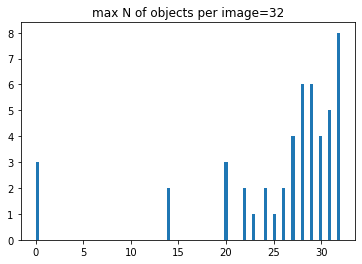

Counter({'41': 45, '22': 45, '13': 45, '44': 45, '21': 44, '11': 44, '32': 44, '12': 44, '42': 44, '33': 44, '23': 44, '24': 44, '31': 43, '43': 43, '34': 43, '15': 43, '17': 43, '37': 41, '25': 41, '16': 41, '14': 40, '35': 40, '47': 39, '26': 39, '45': 37, '27': 36, '36': 31, '46': 29, '48': 28, '38': 26, '28': 24, '18': 21, 'spoon': 1})


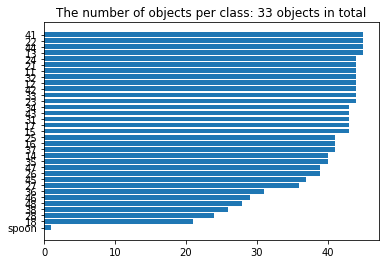

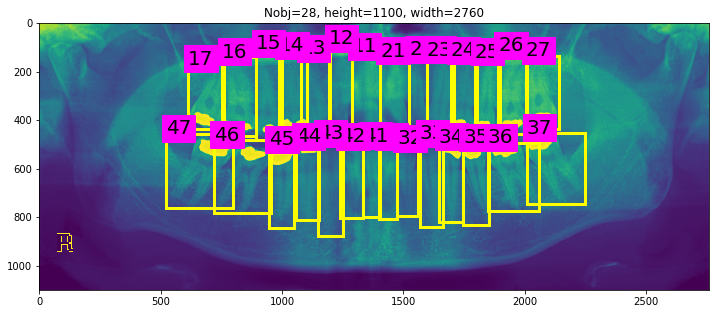

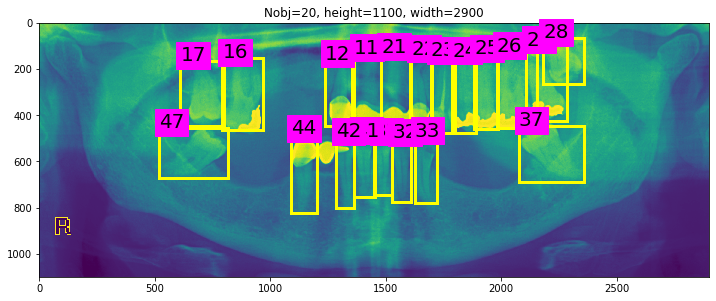

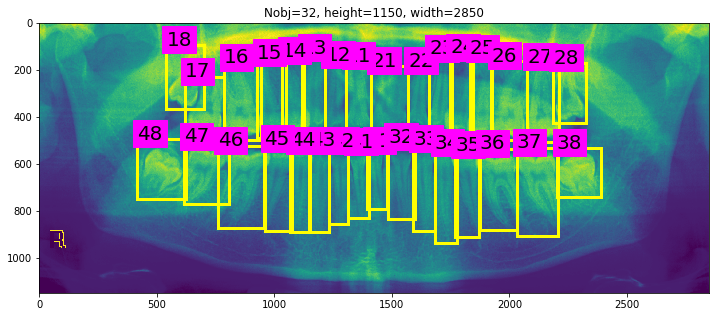

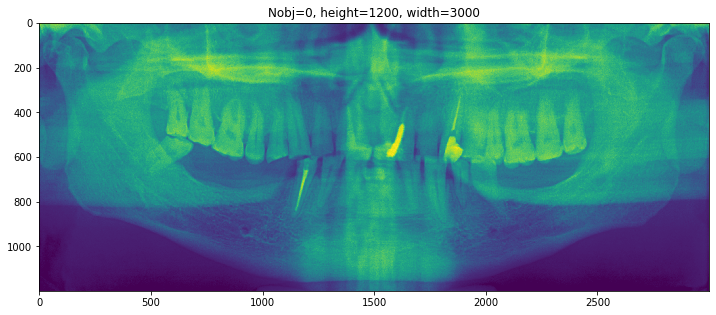

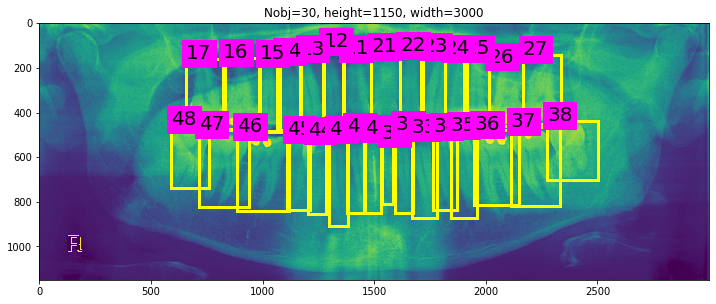

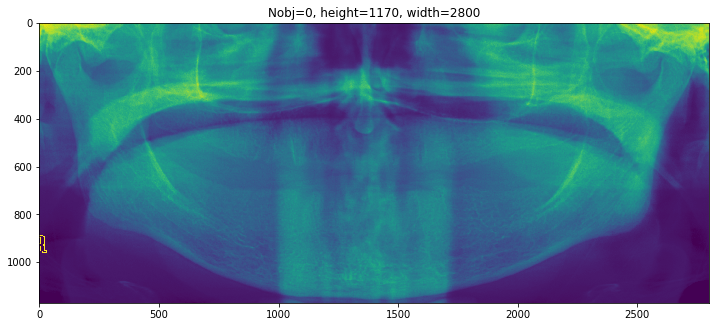

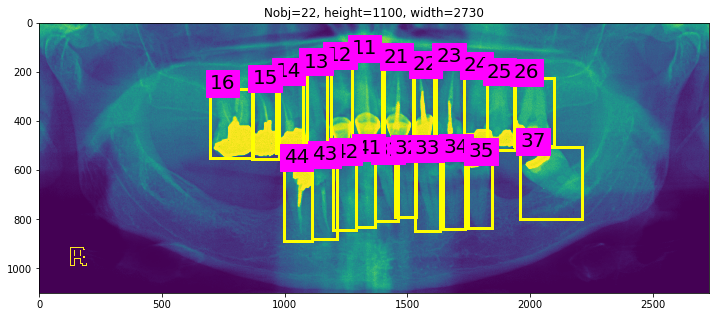

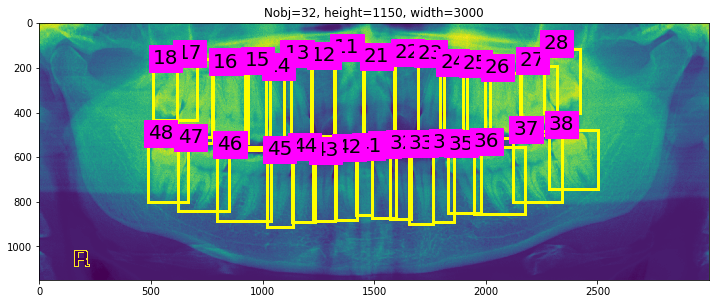

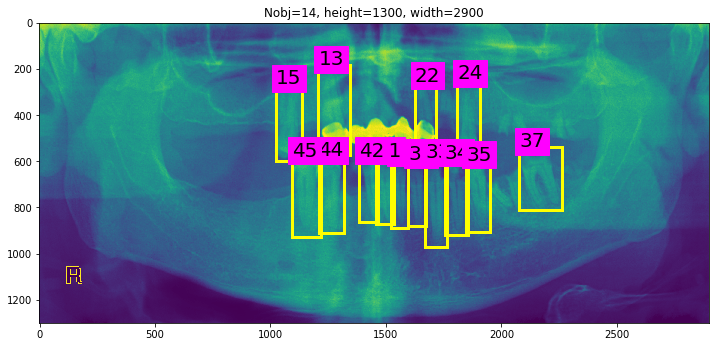

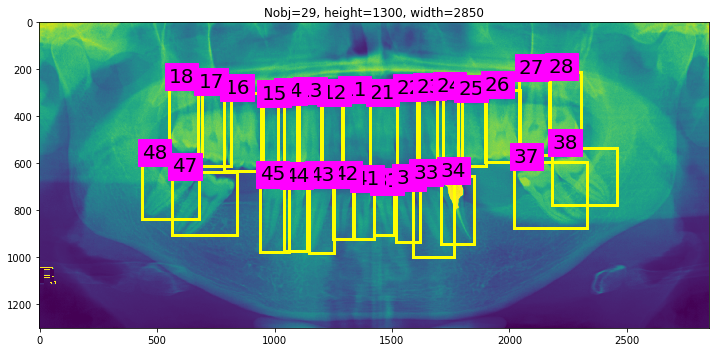

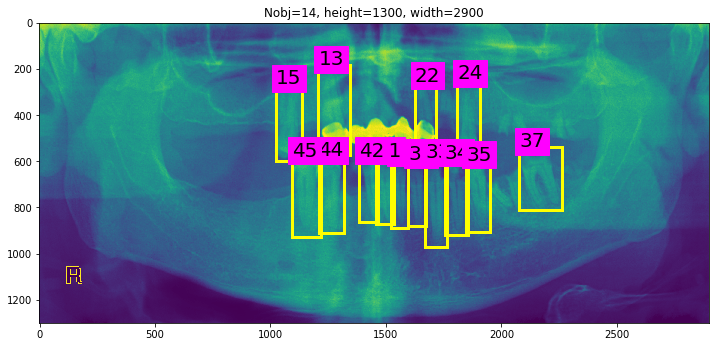

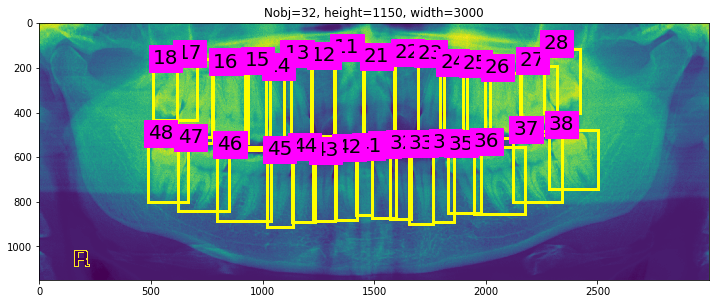

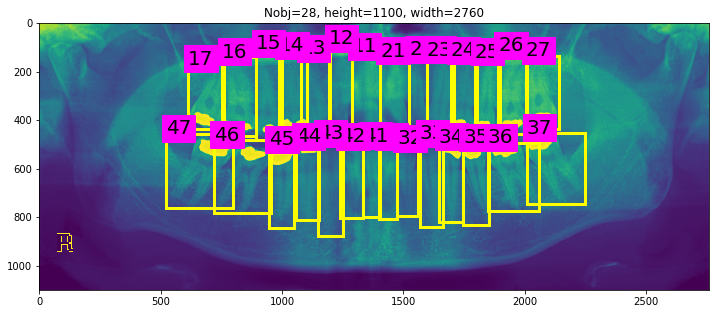

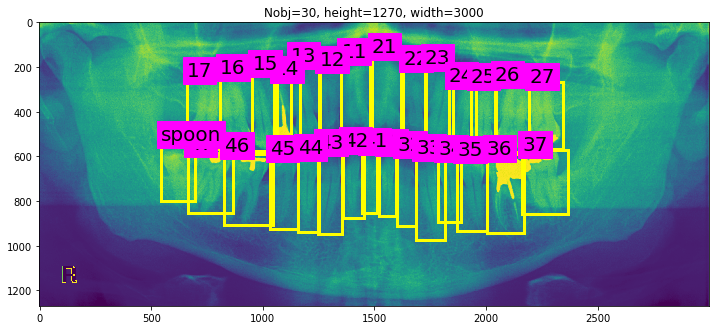

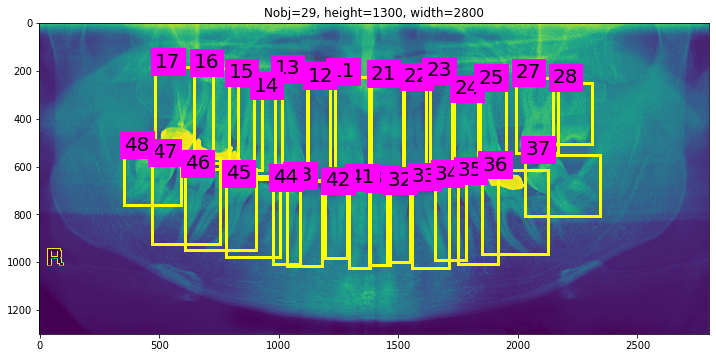

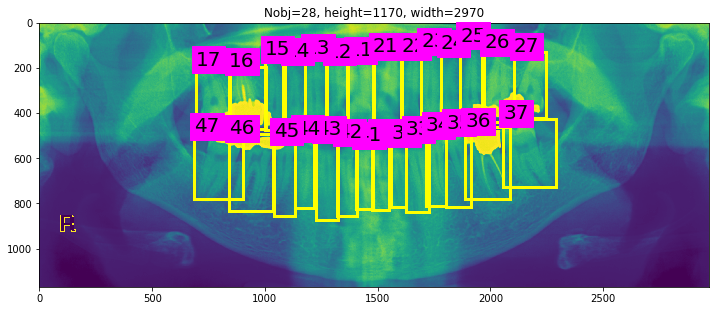

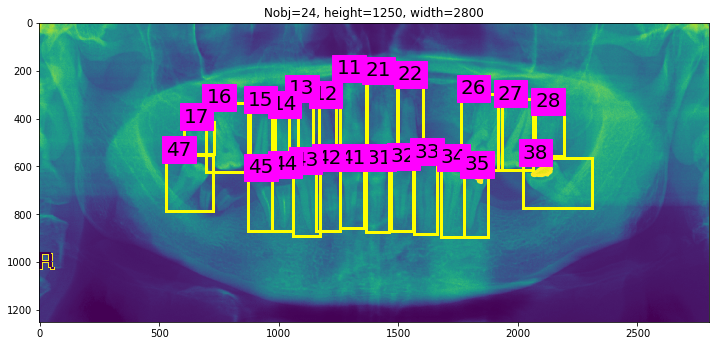

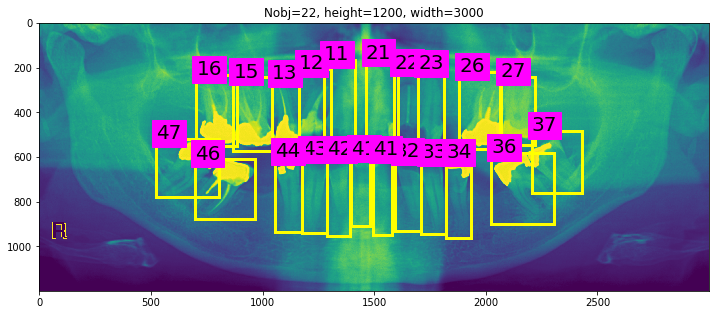

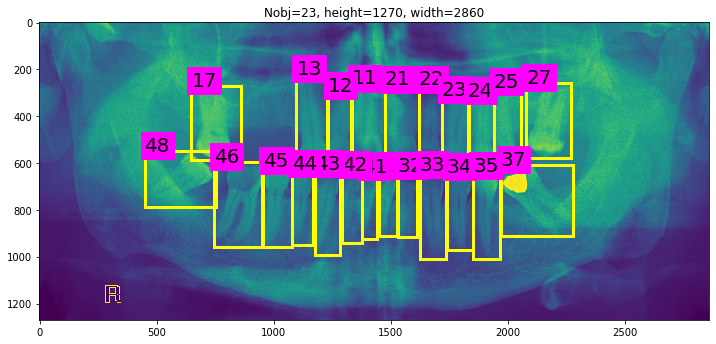

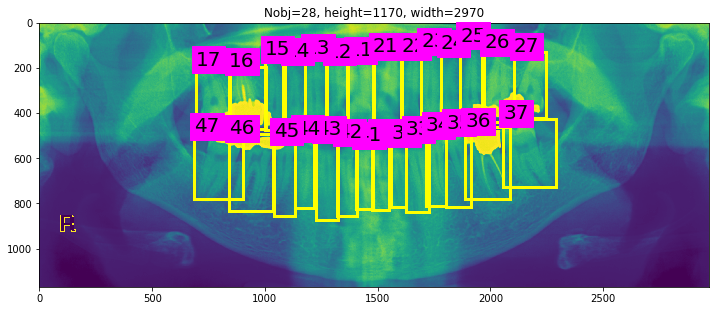

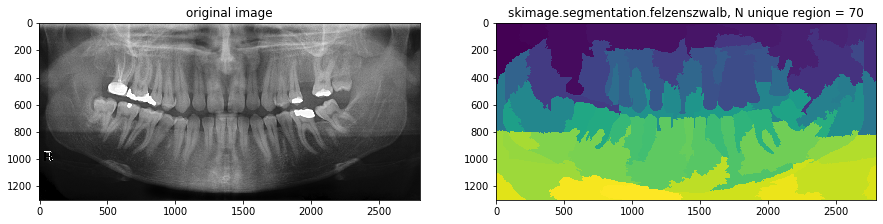

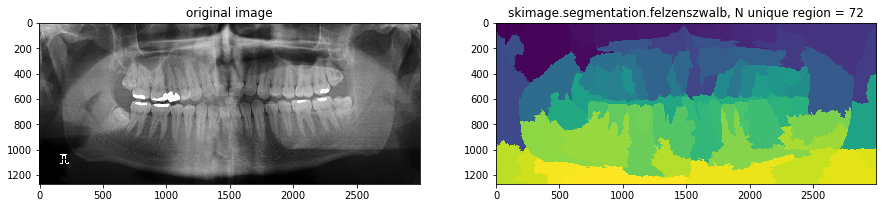

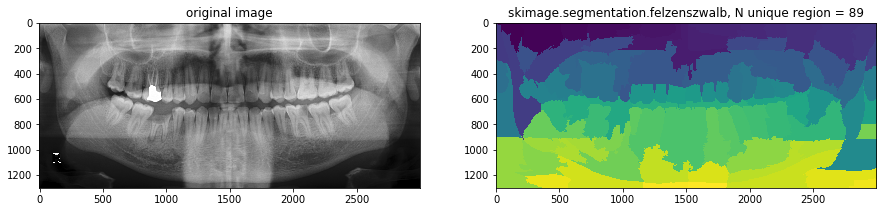

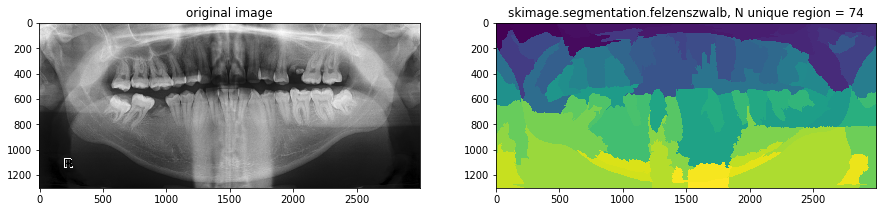

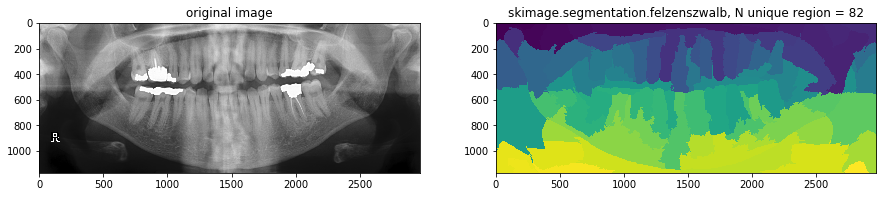

82 rectangle regions are found


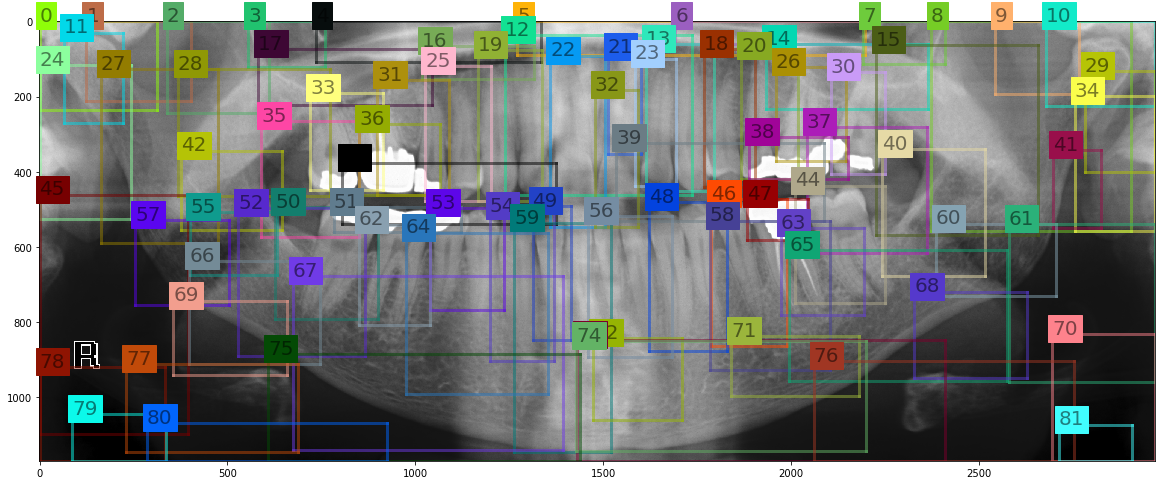

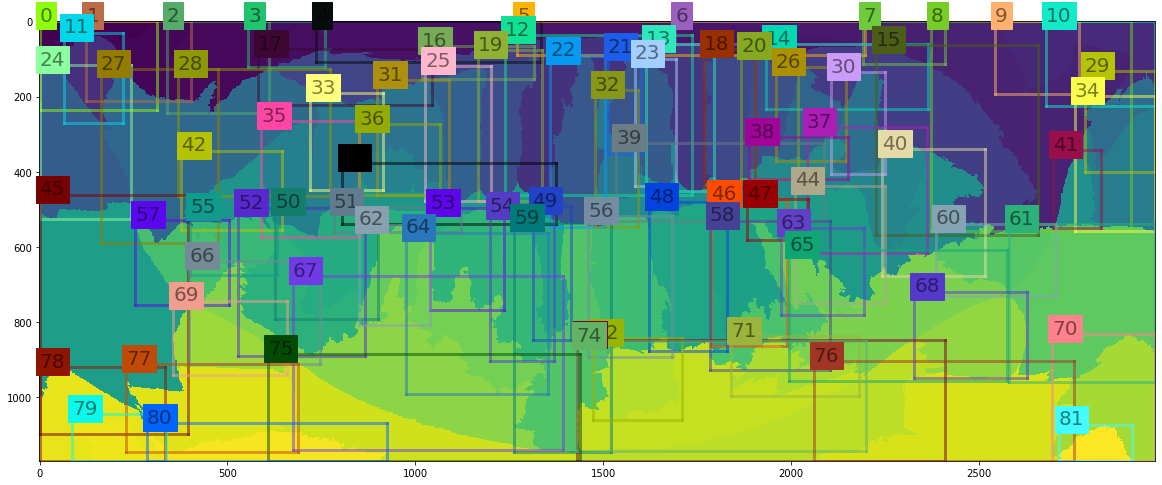

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


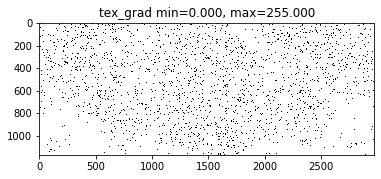

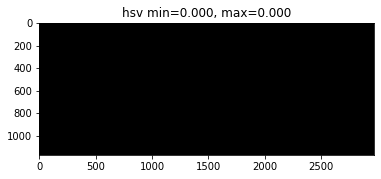

Out of 82 regions, we found 239 intersecting pairs
S[(Pair of the intersecting regions)] = Similarity index
S[( 0,  1)]=7.67
S[( 0, 11)]=7.70
S[( 0, 24)]=7.64
S[( 0, 27)]=7.49
S[( 1, 11)]=7.79
S[( 1, 24)]=7.78
S[( 1, 27)]=7.69
S[( 1, 28)]=7.74
S[( 2,  3)]=7.65
S[( 2, 17)]=7.62
S[( 2, 27)]=7.78
S[( 2, 28)]=7.73
S[( 3,  4)]=7.49
S[( 3, 17)]=7.70
S[( 4,  5)]=7.68
S[( 4, 12)]=7.40
S[( 4, 16)]=7.42
S[( 4, 17)]=7.70
S[( 4, 19)]=7.30
S[( 5,  6)]=7.32
S[( 5, 12)]=7.44
S[( 5, 13)]=7.37
S[( 5, 14)]=7.58
S[( 5, 16)]=7.55
S[( 5, 18)]=7.33
S[( 5, 19)]=7.24
S[( 5, 20)]=7.31
S[( 5, 21)]=7.32
S[( 6, 12)]=7.01
S[( 6, 13)]=7.16
S[( 6, 14)]=7.32
S[( 7, 14)]=7.73
S[( 7, 15)]=7.58
S[( 8,  9)]=7.72
S[( 8, 10)]=7.57
S[( 8, 15)]=7.72
S[( 8, 29)]=7.70
S[( 8, 34)]=7.55
S[( 8, 40)]=7.70
S[( 8, 41)]=7.78
S[( 8, 60)]=7.67
S[( 8, 61)]=6.56
S[( 9, 15)]=7.79
S[(10, 29)]=7.62
S[(10, 34)]=7.58
S[(11, 27)]=7.74
S[(12, 13)]=7.73
S[(12, 16)]=7.47
S[(12, 19)]=7.65
S[(12, 21)]=7.69
S[(12, 22)]=7.76
S[(12, 23)]=7.71
S[(12, 3

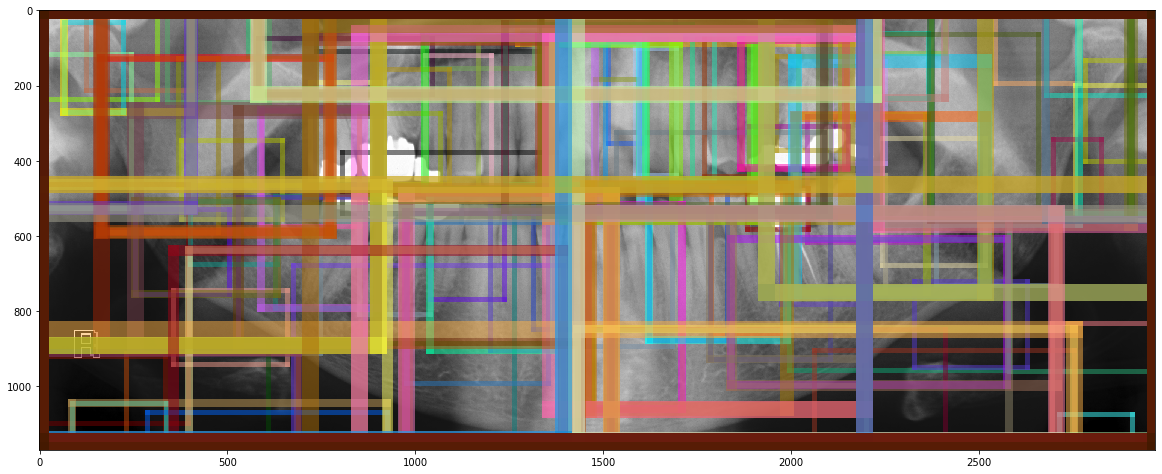

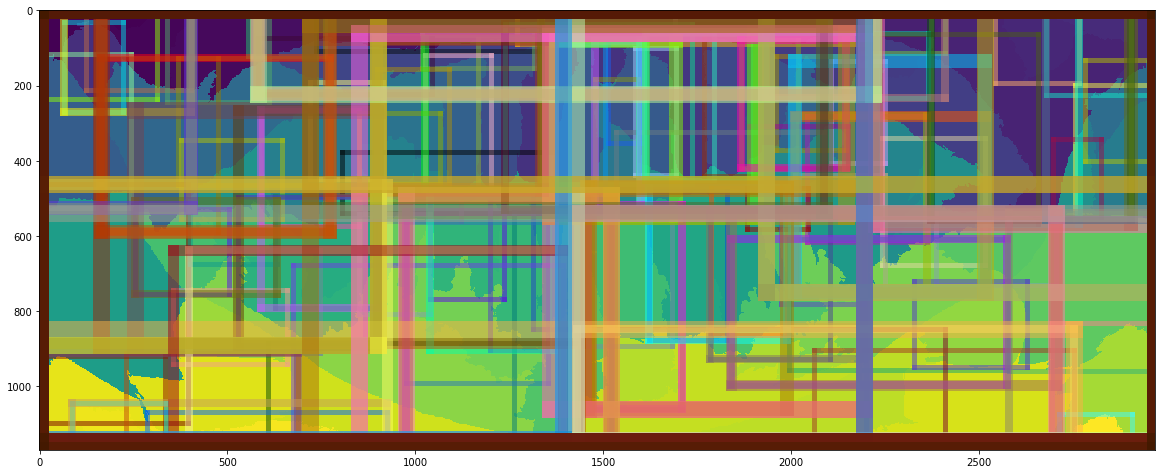

217 regions are found
TIME TOOK : 6.357828776041667e-08MIN
Total N of person : 0, Total N of person found : 0.0, TPR:  nan
Total N of person : 0, Total N of person found : 0.0, TPR:  nan
3.7.7 (default, Mar 23 2020, 17:31:31) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


/Users/charleshajjar/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/charleshajjar/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: index 3 is out of bounds for axis 2 with size 2

In [4]:
import selective_search as ss

img_dir   = "/Users/charleshajjar/Desktop/sujet_altran/dent-PascalVOC-export/JPEGImages"
imgnm     = "/Users/charleshajjar/Desktop/sujet_altran/dent-PascalVOC-export/JPEGImages/10.png"

# import 8 bits degital image (each digit ranges between 0 - 255)
img_8bit  = imageio.imread(os.path.join(img_dir,imgnm))
## region proposal codes 
regions  = ss.get_region_proposal(img_8bit,min_size=4000)

#print("{} candidate regions are proposed.".format(len(regions)))


In [ ]:
def warp(img, newsize):
    '''
    warp image 
    
    
    img     : np.array of (height, width, Nchannel)
    newsize : (height, width)
    '''
    img_resize = skimage.transform.resize(img,newsize)
    return(img_resize)


warped_size = (224, 224)
X = []
for i in [1511,1654,1713,1692,1757]:
    r = regions[i]
    ## extract a single candidate region
    x , y , width, height = r["rect"]
    img_bb     = img_8bit[y:y + height,x:x + width]
    ## warp image
    img_warped = warp(img_bb, warped_size)
    ## create CNN feature
    feature = modelvgg.predict(img_warped.reshape(1,warped_size[0],warped_size[1],3))
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_bb)
    ax.set_title("region proposal, shape={}".format(img_bb.shape))
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(img_warped)
    ax.set_title("warped image, shape={}".format(img_warped.shape))

    ax = fig.add_subplot(1,3,3)    
    ax.imshow(feature, cmap='hot')
    ax.set_title("feature length = {}".format(len(feature.flatten())))
    plt.show()